In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd drive/MyDrive/yolo

/content/drive/MyDrive/yolo


In [8]:
ls

coco.names  image.jpg  walk.jpeg  yolov4.cfg  yolov4.weights


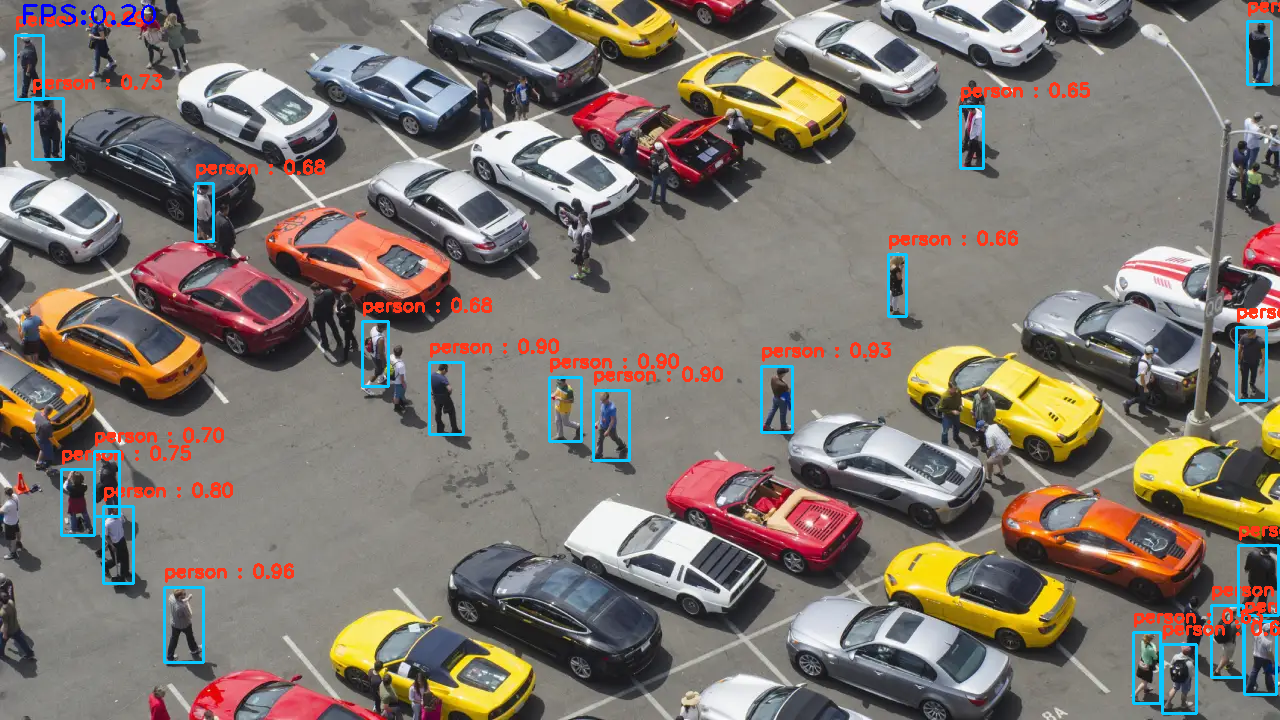

In [11]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("/content/image.jpg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
fps=1/(y-x)
for (classid, score, box) in zip(classes, scores, boxes):
  if classid == 0:
    if isinstance(classid, (list, np.ndarray)):
      classid_value = classid[0]
    else:
      classid_value = classid

# Check if score is a list or a scalar
    if isinstance(score, (list, np.ndarray)):
     score_value = score[0]
    else:
      score_value = score
      label = "%s : %.2f" % (class_names[classid_value], score_value)
      cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
      cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
      cv2.putText(img, "FPS:{0:.2f}".format(fps),(20, 25), cv2.FONT_HERSHEY_PLAIN,fontScale=2,color=(255, 0, 0),thickness=2)
cv2_imshow(img)